Epoch [1/10], Train Loss: 0.0598, Val Loss: 0.0426
Epoch [2/10], Train Loss: 0.0377, Val Loss: 0.0349
Epoch [3/10], Train Loss: 0.0342, Val Loss: 0.0330
Epoch [4/10], Train Loss: 0.0327, Val Loss: 0.0319
Epoch [5/10], Train Loss: 0.0316, Val Loss: 0.0301
Epoch [6/10], Train Loss: 0.0294, Val Loss: 0.0286
Epoch [7/10], Train Loss: 0.0285, Val Loss: 0.0278
Epoch [8/10], Train Loss: 0.0279, Val Loss: 0.0274
Epoch [9/10], Train Loss: 0.0274, Val Loss: 0.0271
Epoch [10/10], Train Loss: 0.0271, Val Loss: 0.0268


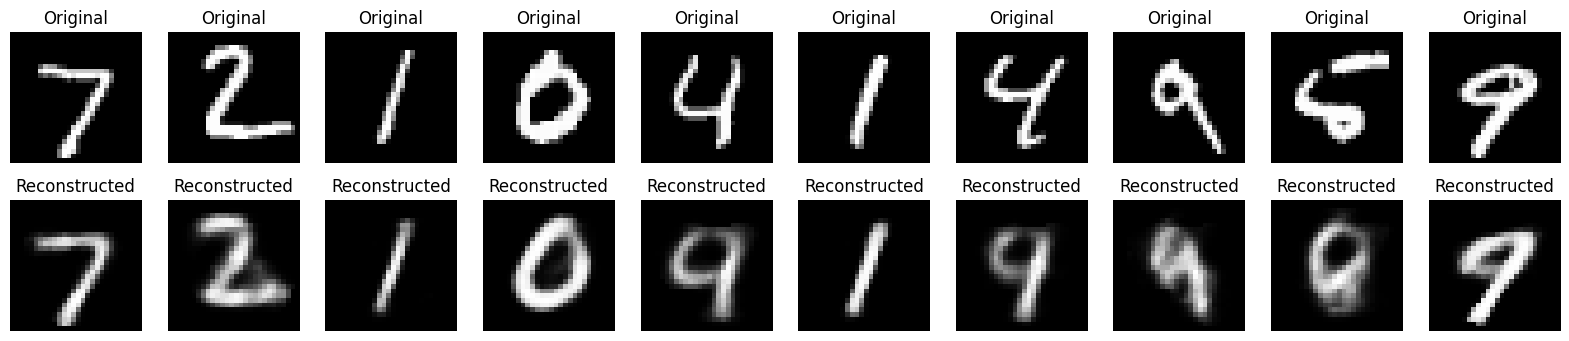

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 16)
        self.fc3 = nn.Linear(16, 128)
        self.fc4 = nn.Linear(128, 784)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 784)  
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x


model = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        inputs, _ = batch 
        inputs = inputs.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs.view(-1, 784))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs, _ = batch 
            inputs = inputs.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, inputs.view(-1, 784))
            val_loss += loss.item()
    val_loss /= len(val_loader)

    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

model.eval()
with torch.no_grad():
    inputs, _ = next(iter(val_loader))
    inputs = inputs.to(device)
    outputs = model(inputs)
    outputs = outputs.view(-1, 1, 28, 28)

    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))
    for i in range(10):
        axes[0, i].imshow(inputs[i].squeeze().cpu().numpy(), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(outputs[i].squeeze().cpu().numpy(), cmap='gray')
        axes[1, i].set_title('Reconstructed')
        axes[1, i].axis('off')

    plt.show()